In [3]:
from pykrx import stock

In [4]:
market = "KOSDAQ"
tickers = stock.get_market_ticker_list(market=market)
print(len(tickers))

1634


In [5]:
ticker = tickers[1]
print(ticker)

054620


## OHLCV 조회

In [31]:
df = stock.get_market_ohlcv("20200301", "20230401", ticker, adjusted=True)
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-03-02,9610,9980,9430,9890,370257
2020-03-03,10250,10650,9980,10200,578524
2020-03-04,10000,11300,9970,11150,824167
2020-03-05,11200,11300,10700,10900,346499
2020-03-06,10600,10800,10350,10650,396522


In [32]:
df.reset_index(inplace=True)
df.head()

,날짜,시가,고가,저가,종가,거래량
0,2020-03-02,9610,9980,9430,9890,370257
1,2020-03-03,10250,10650,9980,10200,578524
2,2020-03-04,10000,11300,9970,11150,824167
3,2020-03-05,11200,11300,10700,10900,346499
4,2020-03-06,10600,10800,10350,10650,396522


## 종목 기본정보 조회

In [24]:
df2 = stock.get_market_fundamental("20210104", "20210108", ticker)
print(df2.head())

              BPS  PER   PBR  EPS  DIV  DPS
날짜                                         
2021-01-04  10530  0.0  0.76    0  0.0    0
2021-01-05  10530  0.0  0.75    0  0.0    0
2021-01-06  10530  0.0  0.73    0  0.0    0
2021-01-07  10530  0.0  0.73    0  0.0    0
2021-01-08  10530  0.0  0.71    0  0.0    0


## 52주 최고가 조회

In [25]:
df['52_week_high'] = df['고가'].rolling(window='365D').max()
df.head()

,시가,고가,저가,종가,거래량,52_week_high
날짜,,,,,,
2020-03-02,9610,9980,9430,9890,370257,9980.0
2020-03-03,10250,10650,9980,10200,578524,10650.0
2020-03-04,10000,11300,9970,11150,824167,11300.0
2020-03-05,11200,11300,10700,10900,346499,11300.0
2020-03-06,10600,10800,10350,10650,396522,11300.0


In [26]:
df['52_week_low'] = df['저가'].rolling(window='365D').min()
df['52_week_low']

날짜
2020-03-02    9430.0
2020-03-03    9430.0
2020-03-04    9430.0
2020-03-05    9430.0
2020-03-06    9430.0
               ...  
2023-03-27    7500.0
2023-03-28    7500.0
2023-03-29    7500.0
2023-03-30    7500.0
2023-03-31    7500.0
Name: 52_week_low, Length: 764, dtype: float64

In [28]:
a = df[['52_week_high', '52_week_low']].copy()

In [30]:
a.reset_index(inplace=True)
a

,날짜,52_week_high,52_week_low
0,2020-03-02,9980.0,9430.0
1,2020-03-03,10650.0,9430.0
2,2020-03-04,11300.0,9430.0
3,2020-03-05,11300.0,9430.0
4,2020-03-06,11300.0,9430.0
...,...,...,...
759,2023-03-27,16900.0,7500.0
760,2023-03-28,16900.0,7500.0
761,2023-03-29,16900.0,7500.0
762,2023-03-30,16900.0,7500.0


In [11]:
high_history = df[df['고가'] == df['52_week_high']]['52_week_high']
high_history.head()

날짜
2020-03-02     9980.0
2020-03-03    10650.0
2020-03-04    11300.0
2020-03-05    11300.0
2021-04-15    11050.0
Name: 52_week_high, dtype: float64

In [13]:
low_history = df[df['저가'] == df['52_week_low']]['52_week_low'].head()
low_history

날짜
2020-03-02    9430.0
2020-03-09    9170.0
2020-03-10    8780.0
2020-03-11    8680.0
2020-03-12    7120.0
Name: 52_week_low, dtype: float64

## 5, 10, 20, 60, 120 지수 이평 그리기

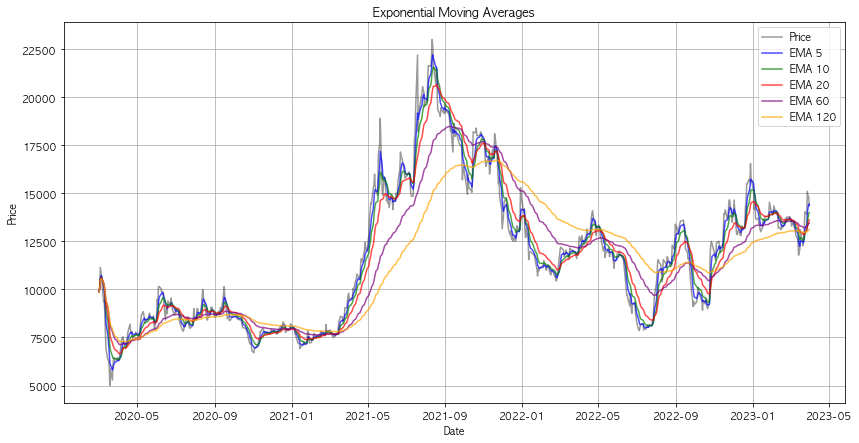

In [15]:
import matplotlib.pyplot as plt

df['EMA_5'] = df['종가'].ewm(span=5).mean()
df['EMA_10'] = df['종가'].ewm(span=10).mean()
df['EMA_20'] = df['종가'].ewm(span=20).mean()
df['EMA_60'] = df['종가'].ewm(span=60).mean()
df['EMA_120'] = df['종가'].ewm(span=120).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['종가'], label='Price', color='black', alpha=0.4)
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='blue', alpha=0.7)
plt.plot(df.index, df['EMA_10'], label='EMA 10', color='green', alpha=0.7)
plt.plot(df.index, df['EMA_20'], label='EMA 20', color='red', alpha=0.7)
plt.plot(df.index, df['EMA_60'], label='EMA 60', color='purple', alpha=0.7)
plt.plot(df.index, df['EMA_120'], label='EMA 120', color='orange', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Exponential Moving Averages')
plt.legend()
plt.grid()

plt.show()

## 최근 수익률 높은 종목들 조회

In [6]:
kosdaq = stock.get_market_price_change("20230324", '20230423', market="KOSDAQ")
kosdaq.head()

/opt/homebrew/Caskroom/miniforge/base/envs/stocks/lib/python3.9/site-packages/pykrx/stock/api.py:630: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_0 = df_0.append(df_1[cond])


,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
060310,3S,2070,2240,170,8.21,7077774,16323187095
054620,APS홀딩스,13000,12250,-750,-5.77,3463195,49203393930
265520,AP시스템,20600,21100,500,2.43,3677395,80965143650
211270,AP위성,22500,17880,-4620,-20.53,32559029,738123564620
126600,BGF에코머티리얼즈,5260,8110,2850,54.18,64047922,517891088990


In [7]:
profit = kosdaq['등락률'].values

In [8]:
kosdaq.columns

Index(['종목명', '시가', '종가', '변동폭', '등락률', '거래량', '거래대금'], dtype='object')

In [9]:
import numpy as np

In [10]:
np.argsort(profit)[-20:]

array([1385, 1364, 1255,  459,  904,  635, 1136, 1176, 1457, 1330, 1532,
        599, 1227, 1549, 1139,  630, 1112,  542,  858,  765])

In [11]:
top = kosdaq.iloc[np.argsort(profit)[-20:]]
top.head()

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
073640,테라사이언스,2255,4450,2195,97.34,125705373,430100233895
900250,크리스탈신소재,866,1760,894,103.23,395689210,615740346085
363250,진시스템,7400,15140,7740,104.59,10579329,141796927480
206400,베노홀딩스,2710,5640,2930,108.12,13965247,51901195025
227950,엔투텍,718,1534,816,113.65,304040093,464130554007


In [14]:
top.reset_index(inplace=True)

In [17]:
tickers = list(top['티커'])
tickers

['073640',
 '900250',
 '363250',
 '206400',
 '227950',
 '033790',
 '096040',
 '234920',
 '022100',
 '082660',
 '106080',
 '222810',
 '051980',
 '101680',
 '024810',
 '317770',
 '131400',
 '101000',
 '109960',
 '096610']

In [18]:
from kyu_stocks import *

In [ ]:
for ticker in tickers:
    get_52price(ticker, start_date, end_date)